## BERT 预训练模型及文本分类

#### 介绍

如果你关注自然语言处理技术的发展，那你一定听说过 BERT，它的诞生对自然语言处理领域具有着里程碑式的意义。本次试验将介绍 BERT 的模型结构，以及将其应用于文本分类实践。

#### 知识点

- 语言模型和词向量
- BERT 结构详解
- BERT 文本分类

---

[BERT](https://arxiv.org/abs/1810.04805) 全称为 Bidirectional Encoder Representations from Transformer，是谷歌在 2018 年 10 月发布的语言表示模型。BERT 通过维基百科和书籍语料组成的庞大语料进行了预训练，使用时只要根据下游任务进行输出层的修改和模型微调训练，就可以得到很好的效果。BERT 发布之初，就在 GLUE、MultiNLI、SQuAD 等评价基准和数据集上取得了超越当时最好成绩的结果。但在深入了解 BERT 结构之前，先需要了解一下什么是语言模型，以及在 BERT 诞生之前人们是如何进行文本向量化的。

### 语言模型和词向量

[语言模型](https://baike.baidu.com/item/语言模型/5719140?fr=aladdin) 是用于计算文本序列概率的模型。在自然语言处理的发展中，应用较为广泛的语言模型有两种：统计式语言模型和神经网络语言模型。接下来就将分别介绍一下它们。

#### 统计式语言模型

[统计式语言模型](https://baike.baidu.com/item/统计式的语言模型/948653)（Statistical Language Model）是根据概率分布，计算字词所组成的字符串的几率的模型，即公式 $(1)$：

$$
P({\omega}_{1}, \cdots, {\omega}_{m}) \tag{1}
$$

简单来说，统计式语言模型就是计算一句话符不符合语言规律。比如，使用语言模型计算出「我今天吃了一个苹果」的概率，一定比「苹果个我今天吃了一」的概率大，所以前者比后者存在的可能性更大。

在具体构建统计式语言模型时，需要使用统计的方法计算公式 $(1)$，为了便于计算，公式 $(1)$可转化为公式 $(2)$：

$$
P\left(\omega_{1}, \omega_{2}, \ldots, \omega_{m}\right)=P\left(\omega_{1}\right) P\left(\omega_{2} | \omega_{1}\right) P\left(\omega_{3} | \omega_{1}, \omega_{2}\right) \ldots P\left(\omega_{i} | \omega_{1}, \omega_{2}, \ldots, \omega_{i-1}\right) \ldots P\left(\omega_{m} | \omega_{1}, \omega_{2}, \ldots, \omega_{m-1}\right) \tag{2}
$$

但是在实践中，通常文本的长度较长，所以公式 $(2)$ 的估算会非常困难，因此，研究者们根据 [马尔可夫链式法则](https://zh.wikipedia.org/zh-hans/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E9%93%BE) 提出了 N 元模型（N-Gram Model）。于是得到公式 $(3)$：

$$P(\omega_{i}|\omega_{1},\omega_{2}, ..., \omega_{i-1}) \approx P(\omega_{i}|\omega_{i-n+1}, ..., \omega_{i-1}) \tag{3}$$

在 N 元模型中，一般采用字词的出现频率来估计 N 元条件概率。可以想像，当 N 值非常大时，计算频率时会存在数据稀疏问题，所以 N 的取值一般为 3 。统计式语言模型可以使用在许多自然语言处理方面的应用上，如语音识别、机器翻译、词性标注、句法分析和资讯检索。不过统计式语言模型也有其局限性，IBM 曾进行过一次信息检索评测，发现二元语言模型需要数以亿计的词汇才能达到最优表现，而三元语言模型则需要数十亿级别的词汇。

#### 神经网络语言模型

近年来随着深度学习的发展，研究者们设计出了基于神经网络的语言模型，[神经网络语言模型](https://baike.baidu.com/item/神经语言模型)（Nerual Network Language Model）的结构如下图所示：

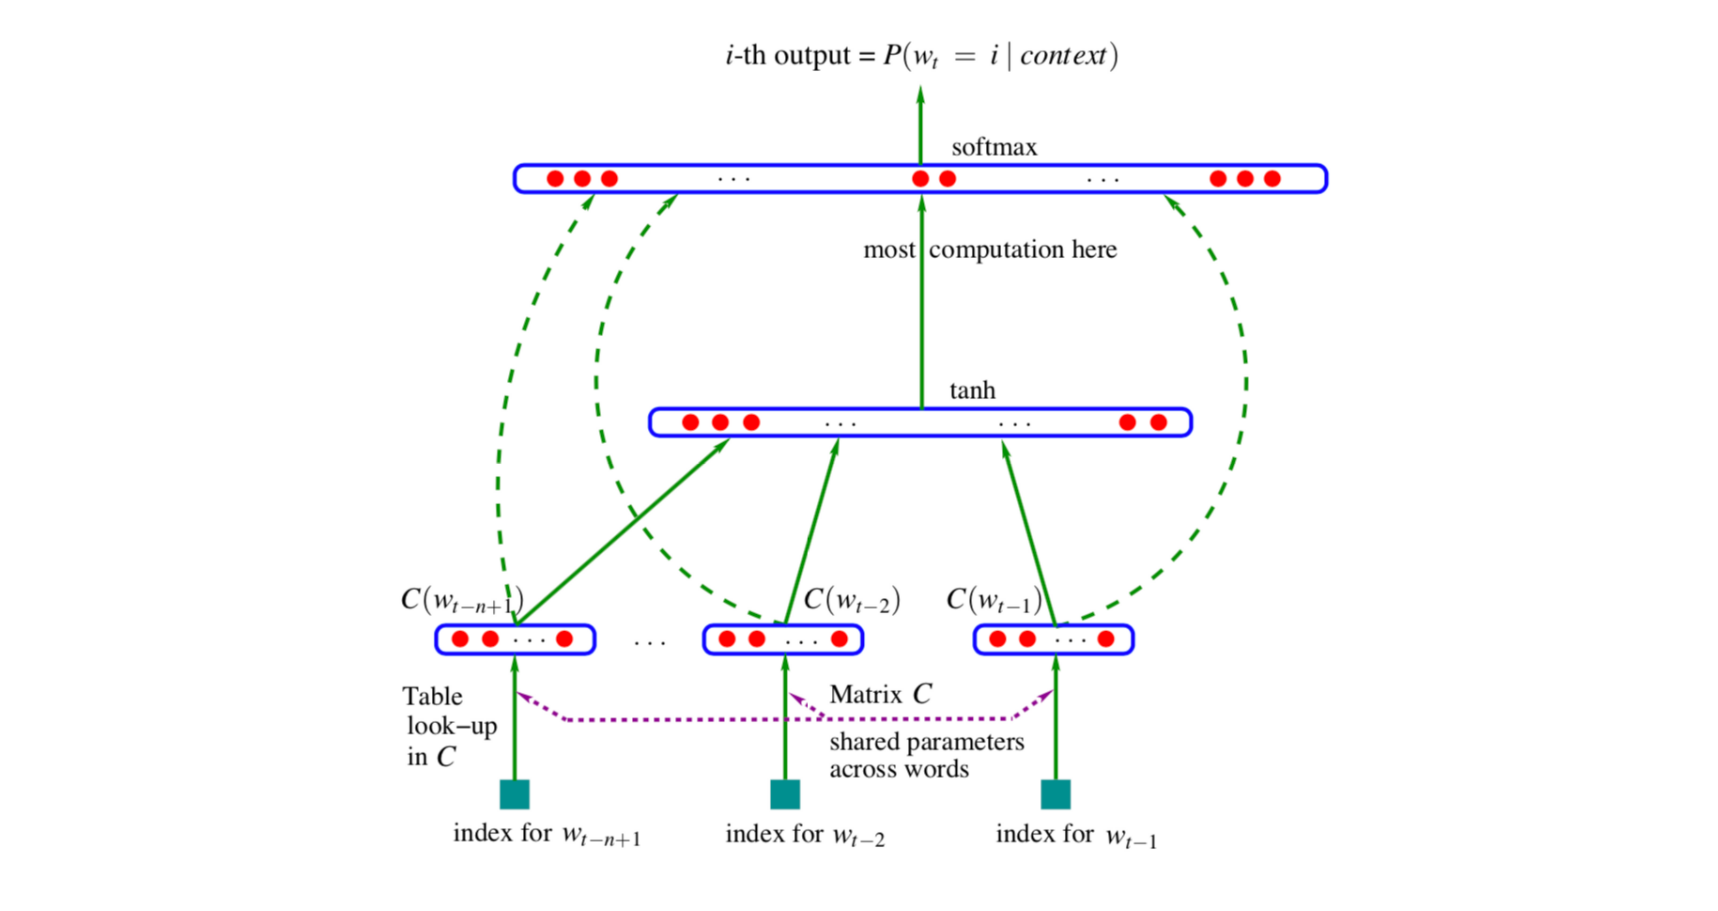

现在来根据上图分析一下模型的结构。首先，最下层的是输入模型的语句所对应的在词表中的编号，然后通过编号在查找表（Look-Up Table）中找到对应的词向量。接下来输入全连接层，激活函数为 tanh，将这一层的输出与原词向量结合输入到最后的全连接层中。最后使用 Softmax 计算在前文语境中下一个词的预测结果。

可以看到，神经网络语言模型主要是使用了全连接层与激活函数代替了统计语言模型的概率计算。在神经网络中有一个副产品：第二个全连接层参数，它就是我们接下来要讲到的词向量。

#### 词向量

受到神经网络语言模型的启发，研究者们发现了进行分布式表示词向量的方法，即通过一个词的上下文语境来表示这个词的含义。并且，对比生成基于稀疏表示（Sparse Representation）的词向量的统计方法，例如词袋模型，神经网络生成的分布式表示（Distributed Representation）词向量获得了更好的效果。

但这个方法也存在弊端，即无法表示多义词，并且这个多义词的含义会受到训练语料的影响。例如，「苹果」这个词，在「我爱吃苹果」和「我喜欢苹果公司」中表示的含义是不同的。但如果在训练语料中，大量的语料表示的是苹果的水果的语义，那训练出的词向量中的「苹果」则会包含水果的语义，结果就会导致模型出现理解偏差。

为了解决这个问题，出现了基于上下文的表示（Contextualized Representation）生成词向量的语言模型，这类模型在对句子进行编码时会结合每个词所在语句的前后文语境，这种基于上下文的词向量就成功解决了区分多义词的问题。BERT 就是这样一种生成基于上下文表示词向量的语言模型，接下来了解一下 BERT 的具体结构。

### BERT 结构详解

BERT 的整体结构如下图所示，其是以 Transformer 为基础构建的，使用 WordPiece 的方法进行数据预处理，最后通过 MLM 任务和下个句子预测任务进行预训练的语言表示模型。下面我们从 BERT 的结构：Transformer 出发，来一步步详细解析一下 BERT。

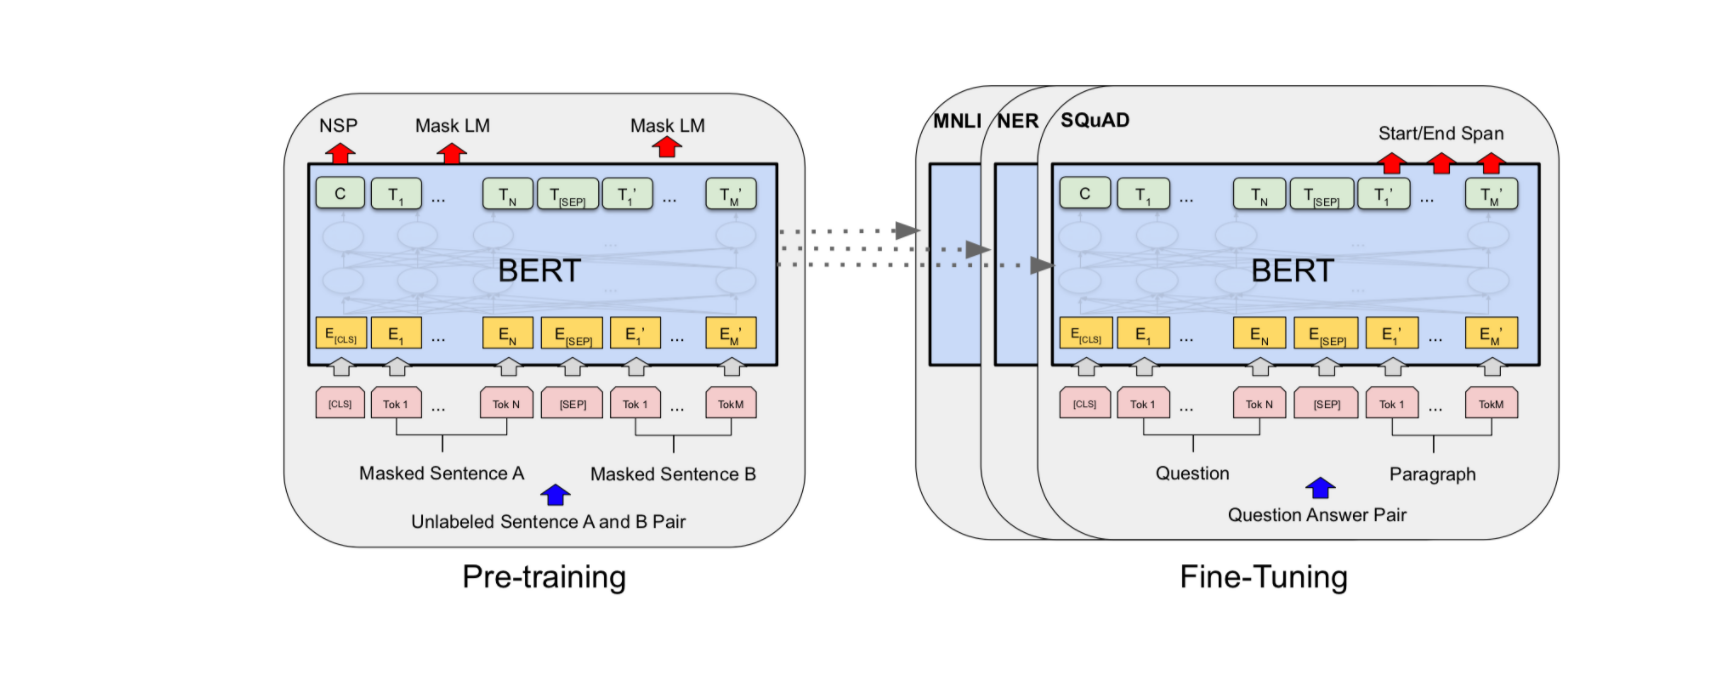

#### Transformer

首先介绍 BERT 模型结构的基础：[Transformer](https://arxiv.org/abs/1706.03762)。Transformer 是一个完全基于注意力机制（Attention mechanism）的模块，对比 RNN（Recurrent Neural Network），当输入的句子是长句子时，RNN 可能会遗忘之前句子中出现的字词，而 Transformer 的注意力机制使得句子中重要的字词的权重增大，从而保证不会被遗忘。并且 Transformer 另一个巨大的优势在于，它可以使用并行的方法运行计算，从而加快了速度。

Transformer 的具体结构如下图：

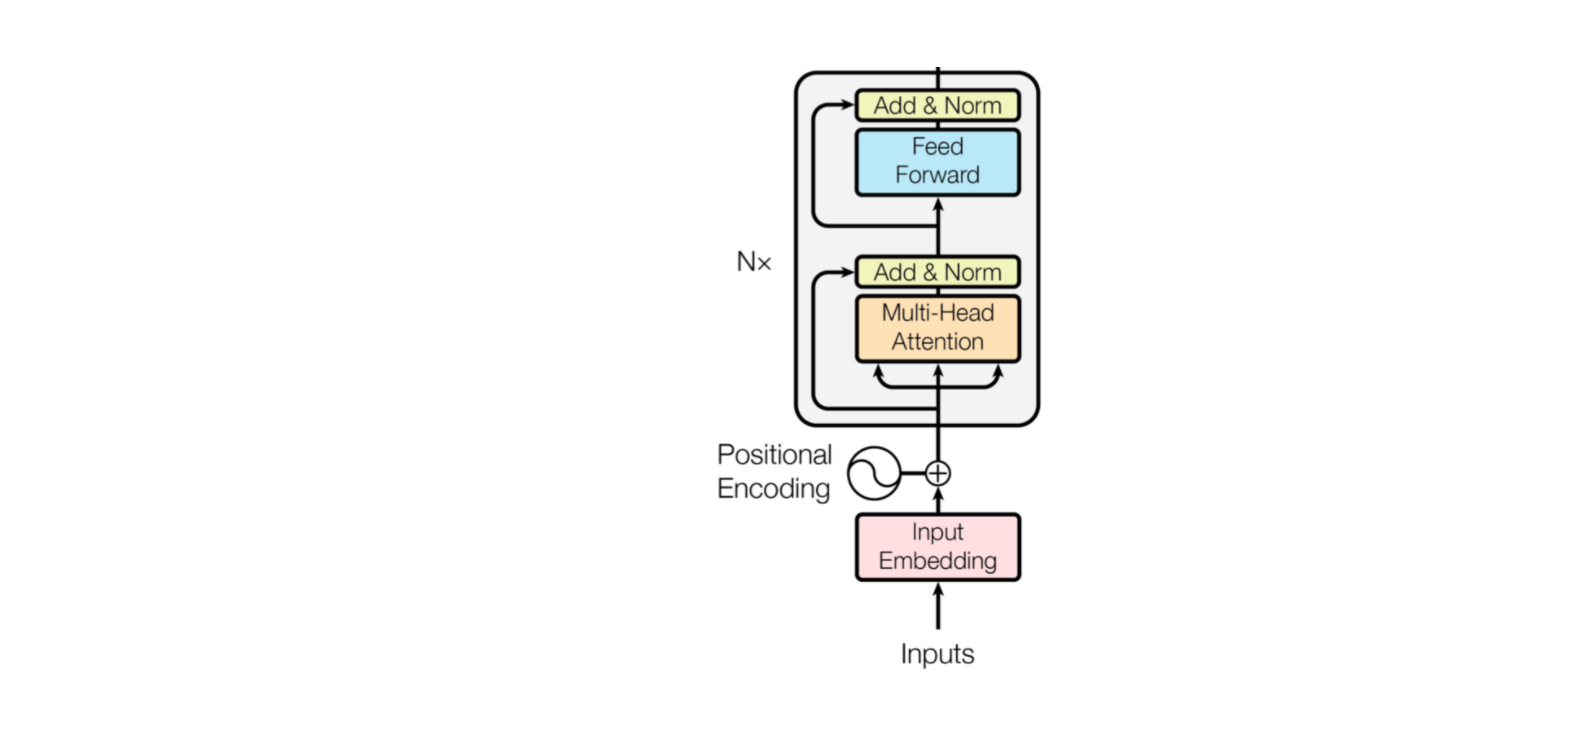

从上图我们可以看到 Transformer 的内部结构为：输入的 inputs 要经过 Input Embedding 模块进行向量化，然后加上对其的 Positional Encoding，然后数据向上进入由 Multi-Head Attention，Add & Norm，Feed Forward 以及又一个 Add & Norm 构成的 N 个整体之中。

其中的 Multi-Head Attention 最为关键，在开始介绍 Transformer 的 Multi-Head Attention 机制之前，我们先简单说一下 Positional Encoding。

Positional Encoding，从字面意思来讲是位置编码，就是用来表示输入句子向量中每个字词所对应的位置。由于 Tranformer 的结构不同，无法像 RNN 一样获取句子的时序信息，所以需要使用 Positional Encoding 表示字词在句子中的先后顺序。一种常见的计算方式是使用正弦函数和余弦函数来构造每个位置的值，后来的研究发现通过可训练的参数来实现的也能够达到同样的效果，BERT 模型中就是通过可训练参数的方法来实现的。

现在来介绍 Transformer 结构的重点：Multi-Head Attention。Multi-Head Attention 的组成因子是 Self-Attention，顾名思义，Self-Attention 就是自注意力，即语句对自身计算注意力权重。公式表示为：

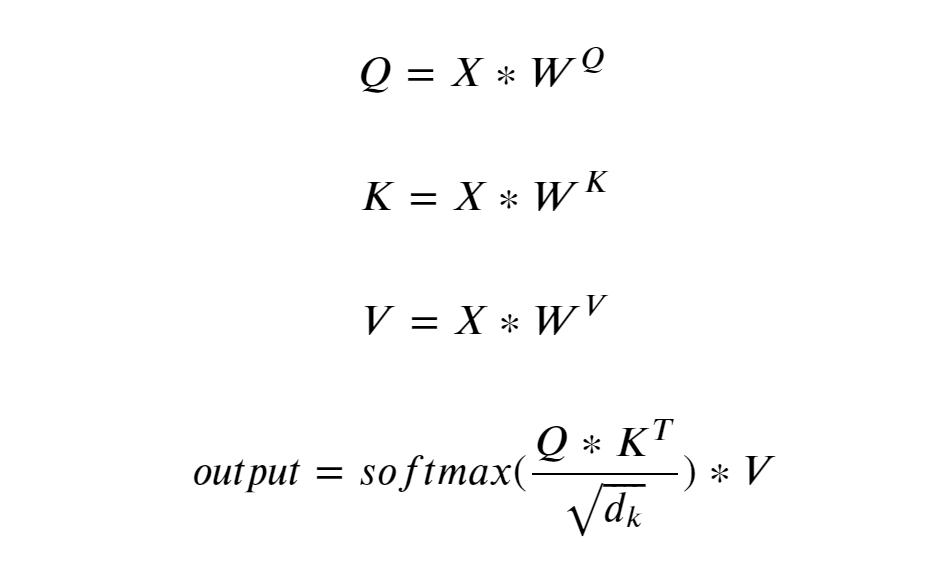

公式中符号含义为：$X$ 表示输入的初始词向量，$Q$ 表示 Query，$K$ 表示 Key，$V$ 表示 Value。

公式 $(7)$ 中，取 $Q$ 中一个行向量为例（也就是每一个输入样本中 $x_i$ 对应的 $q_i$），用 $q_i$ 乘上每一个样本对应的 $k_i$，再除以注意力头的维度，就得到每个样本对应的注意力值。接下来，再使用 Softmax 函数将值转换为和为 1 的概率值（向量形式）并乘上 $V$，得到经过注意力机制计算后的输出值。

该流程也可以参考下图：

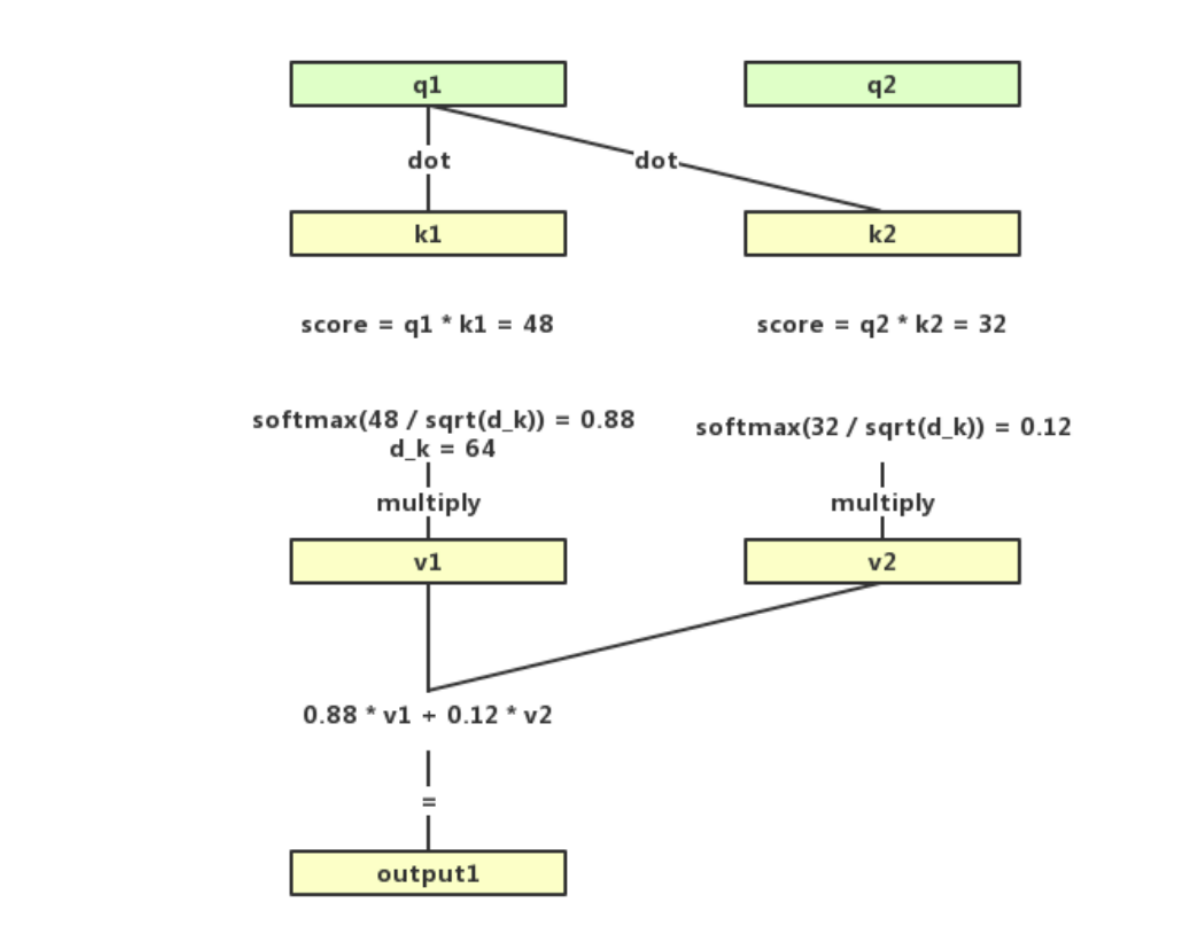

可以看出，BERT 的 Bidirection 特性就在 Self-Attention 机制中得到了体现，即计算句子中的注意力对某个词的分布时，既考虑了在该词左侧的词，也考虑了在该词右侧的词。

现在我们已经了解了 Self-Attention，Multi-Heah Attention 实际上就是多个 Self-Attention 的堆叠。如下图，多层叠加的 Self-Attention 组成了 Multi-Head Attention。不过因为多层的缘故，最后所有 Self-Attention 会生成多个大小相同的矩阵，处理方式是把这些矩阵拼接起来，然后通过乘上一个参数矩阵得到最后的计算结果。

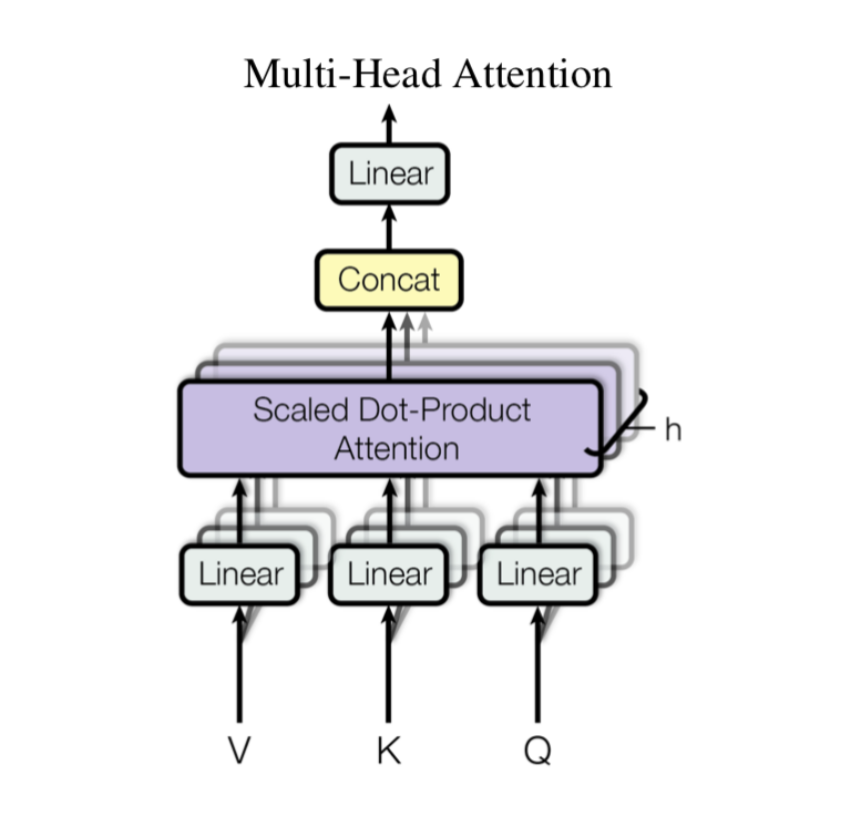

Multi-Head Attention 通过多层的 Self-Attention 可以将输入语句映射到不同的子空间中，于是能够更好地理解到语句所包含的信息。

下面引入一段 BERT 模型对 Self-Attention 的实现代码片段：

<pre style="font-size:14px; line-height:17px;" class="hljs">
# 取自 hugging face 团队实现的基于 pytorch 的 BERT 模型
class BERTSelfAttention(nn.Module):
    # BERT 的 Self-Attention 类
    def __init__(self, config):
        # 初始化函数
        super(BERTSelfAttention, self).__init__()
        if config.hidden_size % config.num_attention_heads != 0:
            raise ValueError(
                "The hidden size (%d) is not a multiple of the number of attention "
                "heads (%d)" % (config.hidden_size, config.num_attention_heads))
        self.num_attention_heads = config.num_attention_heads
        self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        self.query = nn.Linear(config.hidden_size, self.all_head_size)
        self.key = nn.Linear(config.hidden_size, self.all_head_size)
        self.value = nn.Linear(config.hidden_size, self.all_head_size)

    def transpose_for_scores(self, x):
        # 调整维度，转换为 (batch_size, num_attention_heads, hidden_size, attention_head_size)
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

    def forward(self, hidden_states):
        # 前向传播函数
        mixed_query_layer = self.query(hidden_states)
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)

        query_layer = self.transpose_for_scores(mixed_query_layer) 
        key_layer = self.transpose_for_scores(mixed_key_layer)
        value_layer = self.transpose_for_scores(mixed_value_layer)

        # 将"query"和"key"点乘，得到未经处理注意力值
        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))
        attention_scores = attention_scores / math.sqrt(self.attention_head_size)

        # 使用 softmax 函数将注意力值标准化成概率值
        attention_probs = nn.Softmax(dim=-1)(attention_scores)

        context_layer = torch.matmul(attention_probs, value_layer)
        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
        context_layer = context_layer.view(*new_context_layer_shape)
        return context_layer
</pre>

参照之前的 Transformer 的结构，在 Multi-Head Attention 之后是 Add & Norm，将经过注意力机制计算后的向量和原输入相加并归一化，进入 Feed Forward Neural Network，然后再进行一次和输入的相加并完成归一化。

#### 分词方法 WordPiece

前面介绍了 BERT 的具体结构，下面介绍 BERT 使用的数据预处理方法，数据预处理对于模型的训练十分重要，关系到模型的训练效率和准确率的提升。BERT 在对数据预处理时，使用了 WordPiece 的方法，WordPiece 从字面意思理解就是把字词拆成一片一片的。

举个例子来讲，如 look，looked，looking 这三个词，它们其实有同样的意思，但如果我们以词作为单位，那它们就会被认为成不同的词。在英语中这样的情况十分常见，所以为了解决这个问题，WordPiece 会把这三个词拆分成 look，look 和 ##ed，look 和 ##ing，这个方法把词本身和时态表示拆分开，不但能够有效减少词表的大小，提高效率，还能够提升词的区分度。

不过，这个方法对中文是无效的，因为在中文中每个字都是最小的单位，不像英文使用空格分词，并且许多词还能够进一步拆分，所以对中文使用 WordPiece 就相当于按字分割，这也是 BERT 的中文预训练模型的一个局限。因此，尽管 BERT 中文预训练模型效果很好，但也还存在可以改进的空间。有一些研究者就从这个角度出发对中文 BERT 进行了改进，如这篇论文：[中文全词覆盖 BERT ](https://arxiv.org/abs/1906.08101)，研究者在预训练的数据处理过程中将原 BERT 中 WordPiece 的分词方法换成了中文分词的方法，然后对词整体添加掩膜，最后进行预训练。在中文数据集测试上，使用这个改进后的预训练模型的测试结果优于使用原版 BERT 的中文预训练模型的测试结果。

### BERT 预训练模型

上面介绍了 BERT 的结构和 BERT 进行数据预处理使用的 WordPiece 方法，接下来，我们将要介绍 BERT 在预训练阶段的两个任务：遮蔽语言模型和句子预测任务。也正是这两个任务，使得 BERT 学到了对自然语言的理解。

#### 遮蔽语言模型

与常见的训练从左向右语言模型（Left-To-Right Language Model）的预训练任务不同，BERT 是以训练遮蔽语言模型（Masked Language Model）作为的预训练目标，具体来说就是把输入的语句中的字词随机用 `[Mask]` 标签覆盖，然后训练模型结合被覆盖的词的左侧和右侧上下文进行预测。可以看出，BERT 的做法与从左向右语言模型只通过左侧语句预测下一个词的做法相比，遮蔽语言模型能够生成同时融合了左、右上下文的语言表示。这种做法能够使 BERT 学到字词更完整的语义表示。

BERT 的论文中提到，增加掩膜的具体方式为：先对语句进行 WordPiece 分割，分割后选择句中 15% 的字符，例如选择到了第 $i$ 字符，接下来：

1. 以 $80\%$ 的概率使用 `[Mask]` 替换。
2. 以 $10\%$ 的概率使用一个随机的字符替换。
3. 以 $10\%$ 的概率不进行操作。

下面我们使用在 PyTorch-Transformers 模型库中封装好的 `BERTForMaskedLM()` 类来实际看一下 BERT 在预训练后对遮蔽字的预测效果。首先，需要安装 PyTorch-Transformers。

In [ ]:
!pip install pytorch-transformers==1.0  # 安装 PyTorch-Transformers

[PyTorch-Transformers](https://github.com/huggingface/pytorch-transformers) 是一个以 PyTorch 深度学习框架为基础构建的自然语言处理预训练模型库，早前称之为 `pytorch-pretrained-bert`，如果已正式成为独立项目。

使用 PyTorch-Transformers 模型库，先设置好准备输入模型的例子，使用 `BertTokenizer()` 建立分词器对象对原句进行分词，然后对照词表将词转换成序号。

In [ ]:
import torch
from pytorch_transformers import BertTokenizer

model_name = 'bert-base-chinese'  # 指定实验需下载的预训练模型参数

# BERT 在预训练中引入了 [CLS] 和 [SEP] 标记句子的开头和结尾
samples = ['[CLS] 中国的首都是哪里？ [SEP] 北京是 [MASK] 国的首都。 [SEP]']  # 准备输入模型的语句

tokenizer = BertTokenizer.from_pretrained(model_name)
tokenized_text = [tokenizer.tokenize(i) for i in samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_ids = torch.LongTensor(input_ids)
input_ids

接下来使用 `BertForMaskedLM()` 建立模型，并将模型设置模型成验证模式。由于 BERT 模型体积很大，且托管在外网，所以本次实验先从蓝桥云课镜像服务器下载预训练模型，本地实验无需此步骤。

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/1372/bert-base-chinese-shiyanlou.zip"
!unzip -o "bert-base-chinese-shiyanlou.zip"

In [ ]:
from pytorch_transformers import BertForMaskedLM

# 读取预训练模型
model = BertForMaskedLM.from_pretrained(model_name, cache_dir="./")
model.eval()

此时，我们已经准备好了待输入的语句和预训练模型，接下来需要做的就是让模型去预测的覆盖的词的序号。

In [ ]:
outputs = model(input_ids)
prediction_scores = outputs[0]
prediction_scores.shape

最后找到预测值中最大值对应的序号，然后通过 `tokenizer.convert_ids_to_tokens()` 在词表中查找，转换成对应的字。

In [ ]:
import numpy as np

sample = prediction_scores[0].detach().numpy()
pred = np.argmax(sample, axis=1)

tokenizer.convert_ids_to_tokens(pred)[14]

输出结果应该是：

> 中

可以看到，最后的预测结果是正确的的，说明 BERT 真的对语言有了理解。

#### 句子预测任务

预训练 BERT 时除了 MLM 预训练策略，还要进行预测下一个句子的任务。句子预测任务基于理解两个句子间的关系，这种关系无法直接被 Masked Language Model 捕捉到。训练数据的构成是由语料库中的句子组成句子对，详细地说，当选择两个相邻句子 A 和 B 组成预训练样本时，有 50% 的几率使句子 A 在句子 B 之前，50% 的几率使句子 B 在句子 A 之前。尽管这个方法并不复杂，但是这个预训练对于问答任务和自然语言推理任务等下游任务有很好的帮助。

下面我们使用 PyTorch-Transformers 库中的句子预测模型进行实验，观察一下输出结果。

首先构造输入样本，然后进行分词和词向序号的转换。

In [2]:
samples = ["[CLS]今天天气怎么样？[SEP]今天天气很好。[SEP]", "[CLS]小明今年几岁了？[SEP]小明爱吃西瓜。[SEP]"]
tokenizer = BertTokenizer.from_pretrained(model_name)
tokenized_text = [tokenizer.tokenize(i) for i in samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_ids = torch.LongTensor(input_ids)
input_ids

NameError: name 'BertTokenizer' is not defined

构造句子的分段 id，按照上下句分别标为 `0` 和 `1`。

In [ ]:
segments_ids = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

segments_tensors = torch.tensor(segments_ids)
segments_tensors

接下来使用 `BertForNextSentencePrediction()` 初始化模型，再加载 BERT 的预训练参数。

In [ ]:
from pytorch_transformers import BertForNextSentencePrediction

model = BertForNextSentencePrediction.from_pretrained(
    model_name, cache_dir="./")
model.eval()

最后将样本输入模型进行预测，输出模型的预测结果。

In [ ]:
outputs = model(input_ids)
seq_relationship_scores = outputs[0]
seq_relationship_scores

In [ ]:
sample = seq_relationship_scores.detach().numpy()
pred = np.argmax(sample, axis=1)
pred

最终的输出结果应该是：`[0, 1]`。

    
`0` 表示是上下句关系，`1` 表示不是上下句关系。因此从上面结果可以看到，模型预测第一个句子对是上下句关系，第二个句子对不是，对于这两个样本 BERT 的预测正确。

我们通过两个例子来看 BERT 的效果，都是非常理想的。实际上，BERT 效果好的原因主要有两点：

1. 使用的双向的 Transformer 结构学习到左、右两侧上下文语境。
2. 使用完整的文档语料训练而不是打乱的句子，配合下个句子预测任务，从而学习到了捕捉很长的连续语句中的信息的能力。

### BERT 文本分类实践

上面，我们使用 BERT 完成了两个小例子。接下来，实验尝试利用 BERT 完成文本分类任务。实际上，当使用 BERT 完成文本分类时，通常有 2 种方案：

1. 从预训练好的 BERT 模型中提取特征向量，即 Feature Extraction 方法。
2. 将下游任务模型添加到 BERT 模型之后，然后使用下游任务的训练集对进行训练，即 Fine-Tuning 方法。

通常 Fine-Tuning 方法更常被人们使用，因为通过结合下游任务的数据集进行微调从而调整预训练模型参数，使模型能够更好捕捉到下游任务的数据特征。下面使用 Fine-Tuning 方法应用 BERT 预训练模型进行情感分类任务。

首先，下载一个 [情感分类数据集](https://mlln.cn/2018/10/11/%E4%B8%AD%E6%96%87%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90%E8%AF%AD%E6%96%99%E5%BA%93%E5%A4%A7%E5%85%A8-%E5%B8%A6%E4%B8%8B%E8%BD%BD%E5%9C%B0%E5%9D%80/)，我们已经提前下载好并放在蓝桥云课服务器中，可通过以下命令读取。

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/1372/clothing_comment.zip"
!unzip -o "clothing_comment.zip"

下载好数据集后，读取数据文件。

In [ ]:
with open('./negdata.txt', 'r', encoding='utf-8') as f:
    neg_data = f.read()
with open('./posdata.txt', 'r', encoding='utf-8') as f:
    pos_data = f.read()

neg_datalist = neg_data.split('\n')
pos_datalist = pos_data.split('\n')
len(neg_datalist), len(pos_datalist)

在读取到数据后，我们将将数据存到一个列表中，并构建标签列表，用 `1` 表示正面的评论，用 `0` 表示负面的评论。

In [ ]:
import numpy as np

dataset = np.array(pos_datalist + neg_datalist)
labels = np.array([1] * len(pos_datalist) + [0] * len(neg_datalist))
len(dataset)  # 共 3000 条数据

利用 NumPy 库使样本数据随机排列。

In [ ]:
np.random.seed(10)
mix_index = np.random.choice(3000, 3000)
dataset = dataset[mix_index]
labels = labels[mix_index]
len(dataset), len(labels)

然后以取 2500 条数据作为训练集，取 500 条数据作为验证集。

In [ ]:
TRAINSET_SIZE = 2500
EVALSET_SIZE = 500

train_samples = dataset[:TRAINSET_SIZE]  # 2500 条数据
train_labels = labels[:TRAINSET_SIZE]
eval_samples = dataset[TRAINSET_SIZE:TRAINSET_SIZE+EVALSET_SIZE]  # 500 条数据
eval_labels = labels[TRAINSET_SIZE:TRAINSET_SIZE+EVALSET_SIZE]

len(train_samples), len(eval_samples)

构建函数 `get_dummies` ，作用是把标签转换成 one-hot 的表示形式，例如将 `1` 表示成 `[0, 1]`，`0` 表示成 `[1, 0]` 的形式。

In [ ]:
def get_dummies(l, size=2):
    res = list()
    for i in l:
        tmp = [0] * size
        tmp[i] = 1
        res.append(tmp)
    return res

这里使用 PyTorch 提供的 `DataLoader()` 构建训练集数据集表示，使用 `TensorDataset()` 构建训练集数据迭代器。

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

tokenized_text = [tokenizer.tokenize(i) for i in train_samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_labels = get_dummies(train_labels)  # 使用 get_dummies 函数转换标签

for j in range(len(input_ids)):
    # 将样本数据填充至长度为 512
    i = input_ids[j]
    if len(i) != 512:
        input_ids[j].extend([0]*(512 - len(i)))

# 构建数据集和数据迭代器，设定 batch_size 大小为 4
train_set = TensorDataset(torch.LongTensor(input_ids),
                          torch.FloatTensor(input_labels))
train_loader = DataLoader(dataset=train_set,
                          batch_size=4,
                          shuffle=True)
train_loader

与构建训练集数据迭代器类似，构建验证集的数据迭代器。

In [ ]:
tokenized_text = [tokenizer.tokenize(i) for i in eval_samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_labels = eval_labels

for j in range(len(input_ids)):
    i = input_ids[j]
    if len(i) != 512:
        input_ids[j].extend([0]*(512 - len(i)))

eval_set = TensorDataset(torch.LongTensor(input_ids),
                         torch.FloatTensor(input_labels))
eval_loader = DataLoader(dataset=eval_set,
                         batch_size=1,
                         shuffle=True)
eval_loader

检查是否机器有 GPU，如果有就在 GPU 运行，否则就在 CPU 运行。

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

构建一个用于分类的类，加入 BERT 模型，在 BERT 模型下加入一个 `Dropout` 层用于防止过拟合，和一个 `Linear` 全连接层。

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from pytorch_transformers import BertModel


class fn_cls(nn.Module):
    def __init__(self):
        super(fn_cls, self).__init__()
        self.model = BertModel.from_pretrained(model_name, cache_dir="./")
        self.model.to(device)
        self.dropout = nn.Dropout(0.1)
        self.l1 = nn.Linear(768, 2)

    def forward(self, x, attention_mask=None):
        outputs = self.model(x, attention_mask=attention_mask)
        x = outputs[1]  # 取池化后的结果 batch * 768
        x = x.view(-1, 768)
        x = self.dropout(x)
        x = self.l1(x)
        return x

定义损失函数，建立优化器。

In [ ]:
from torch import optim

cls = fn_cls()
cls.to(device)
cls.train()

criterion = nn.BCELoss()
sigmoid = nn.Sigmoid()
optimizer = optim.Adam(cls.parameters(), lr=1e-5)

构建预测函数，用于计算预测结果。

In [ ]:
def predict(logits):
    res = torch.argmax(logits, 1)
    return res

构建训练函数并开始训练。这里需要说一下，因为 GPU 内存的限制，训练集的 `batch_size` 设为了 4，这样的 `batch_size` 过小，使得梯度下降方向不准，引起震荡，难以收敛。所以，在训练时使用了梯度积累的方法，即计算 8 个小批次的梯度的平均值来更新模型，从而达到了 32 个小批次的效果。

In [ ]:
from torch.autograd import Variable
import time

pre = time.time()

accumulation_steps = 8
epoch = 3

for i in range(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data).to(device), Variable(
            target.view(-1, 2)).to(device)

        mask = []
        for sample in data:
            mask.append([1 if i != 0 else 0 for i in sample])
        mask = torch.Tensor(mask).to(device)
        
        output = cls(data, attention_mask=mask)
        pred = predict(output)

        loss = criterion(sigmoid(output).view(-1, 2), target)

        # 梯度积累
        loss = loss/accumulation_steps
        loss.backward()

        if((batch_idx+1) % accumulation_steps) == 0:
            # 每 8 次更新一下网络中的参数
            optimizer.step()
            optimizer.zero_grad()

        if ((batch_idx+1) % accumulation_steps) == 1:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss:{:.6f}'.format(
                i+1, batch_idx, len(train_loader), 100. *
                batch_idx/len(train_loader), loss.item()
            ))
        if batch_idx == len(train_loader)-1:
            # 在每个 Epoch 的最后输出一下结果
            print('labels:', target)
            print('pred:', pred)

print('训练时间：', time.time()-pre)

训练结束后，可以使用验证集观察模型的训练效果。

In [ ]:
from tqdm.notebook import tqdm

cls.eval()

correct = 0
total = 0

for batch_idx, (data, target) in enumerate(tqdm(eval_loader)):
    data = data.to(device)
    target = target.long().to(device)

    mask = []
    for sample in data:
        mask.append([1 if i != 0 else 0 for i in sample])
    mask = torch.Tensor(mask).to(device)

    output = cls(data, attention_mask=mask)
    pred = predict(output)

    correct += (pred == target).sum().item()
    total += len(data)

# 准确率应该达到百分之 90 以上
print('正确分类的样本数：{}，样本总数：{}，准确率：{:.2f}%'.format(
    correct, total, 100.*correct/total))

训练结束后，还可以随意输入一些数据，直接观察模型的预测结果。

In [ ]:
test_samples = ['东西很好，好评！', '东西不好，差评！']

In [ ]:
cls.eval()
tokenized_text = [tokenizer.tokenize(i) for i in test_samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_ids = torch.LongTensor(input_ids).cuda()

mask = torch.ones_like(input_ids).to(device)

output = cls(input_ids, attention_mask=mask)
pred = predict(output)
pred

### 实验总结

本次实验中，我们首先学习了统计式语言模型和神经网络语言模型，然后从神经网络语言模型引入了词向量，并最终学习了可以生成基于上下文的词向量的语言表示模型 BERT。接下来，实验介绍了 BERT 的结构和它的两个预训练阶段任务，并观察了预训练结果。最后使用使用 Fine-Tuning 方法应用 BERT 进行完整的情感分类任务。

<i class="fa fa-link" aria-hidden="true"> 相关链接</i> 

- [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
- [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
- [谷歌开源的 BERT 模型预训练参数和使用 TensorFlow 的实现](https://github.com/google-research/bert)